# Financial Analytics 

# Part-1 

# Applying Machine Learning to the Stock Dataset From Yahoo Finance 

In [327]:

!pip install yfinance # install Yahoo Finance Library to pull data 
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
import plotly.express as px  # for interactive visualisation Plotly
import plotly.graph_objects as go # # for interactive visualisation Plotly 
import datetime as dt
# plotly to work on google colab 
from plotly.offline import iplot
import plotly.io as pio
pio.renderers.default = 'colab'

Amazon Stock for Last 4 years From 2017 till 2021

In [329]:
data = yf.download("AMZN", start="2017-09-01", end="2021-09-20",group_by="ticker") # Pull AMAZON, MICROSOFT, APPLE stocks
print(data)
data = data.sort_values(by="Date")


[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    Adj Close   Volume
Date                                  ...                      
2017-09-01   984.200012   984.500000  ...   978.250000  2535900
2017-09-05   975.400024   976.770020  ...   965.270020  2883200
2017-09-06   968.320007   971.840027  ...   967.799988  2129900
2017-09-07   974.000000   980.590027  ...   979.469971  2566800
2017-09-08   979.099976   979.880005  ...   965.900024  2605300
...                 ...          ...  ...          ...      ...
2021-09-13  3482.800049  3497.959961  ...  3457.169922  2569000
2021-09-14  3475.550049  3486.810059  ...  3450.000000  1936900
2021-09-15  3442.520020  3485.419922  ...  3475.790039  2957500
2021-09-16  3459.959961  3492.550049  ...  3488.239990  2583600
2021-09-17  3488.409912  3497.409912  ...  3462.520020  4614100

[1018 rows x 6 columns]


# Feature Engineering

In [330]:
amazon= pd.DataFrame(data)
amazon.head(5)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-01,984.200012,984.500000,976.880005,978.250000,978.250000,2535900
2017-09-05,975.400024,976.770020,960.369995,965.270020,965.270020,2883200
2017-09-06,968.320007,971.840027,960.599976,967.799988,967.799988,2129900
2017-09-07,974.000000,980.590027,972.549988,979.469971,979.469971,2566800
2017-09-08,979.099976,979.880005,963.469971,965.900024,965.900024,2605300


In [331]:
amazon.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,3482.800049,3497.959961,3438.000000,3457.169922,3457.169922,2569000
2021-09-14,3475.550049,3486.810059,3437.709961,3450.000000,3450.000000,1936900
2021-09-15,3442.520020,3485.419922,3402.010010,3475.790039,3475.790039,2957500
2021-09-16,3459.959961,3492.550049,3446.139893,3488.239990,3488.239990,2583600
2021-09-17,3488.409912,3497.409912,3452.129883,3462.520020,3462.520020,4614100


In [332]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1018 entries, 2017-09-01 to 2021-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1018 non-null   float64
 1   High       1018 non-null   float64
 2   Low        1018 non-null   float64
 3   Close      1018 non-null   float64
 4   Adj Close  1018 non-null   float64
 5   Volume     1018 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.7 KB


In [333]:
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1.018000e+03
mean,2184.813273,2207.791225,2158.813654,2183.960312,2183.960312,4.459456e+06
std,769.854043,778.068131,760.215865,768.646558,768.646558,2.125508e+06
min,945.489990,948.630005,931.750000,938.599976,938.599976,8.813000e+05
25%,1658.177460,1677.662537,1633.462463,1659.692535,1659.692535,2.991975e+06
50%,1872.619995,1889.869995,1855.054993,1870.050049,1870.050049,3.921050e+06
75%,3106.577515,3142.005066,3072.955017,3102.599976,3102.599976,5.323525e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.656500e+07


# Simple Moving Average

In [334]:
# 3 Dimentional Scatter Visulaisation of the Simple Moving Average of Google Stock

amazon['Moving Average-7days'] = amazon['Close'].rolling(window=7).mean()
fig = px.line(amazon, x="Close", y="Moving Average-7days")
#fig= px.line(amazon, x="Close", y="Close")#, z="Date")
#fig.add_scatter(x=google['Close'], y=google['Date'])
fig.update_layout(title= "3 Dimentional Line Visulaisation of the Simple Moving Average of Google Stock")
fig.show()

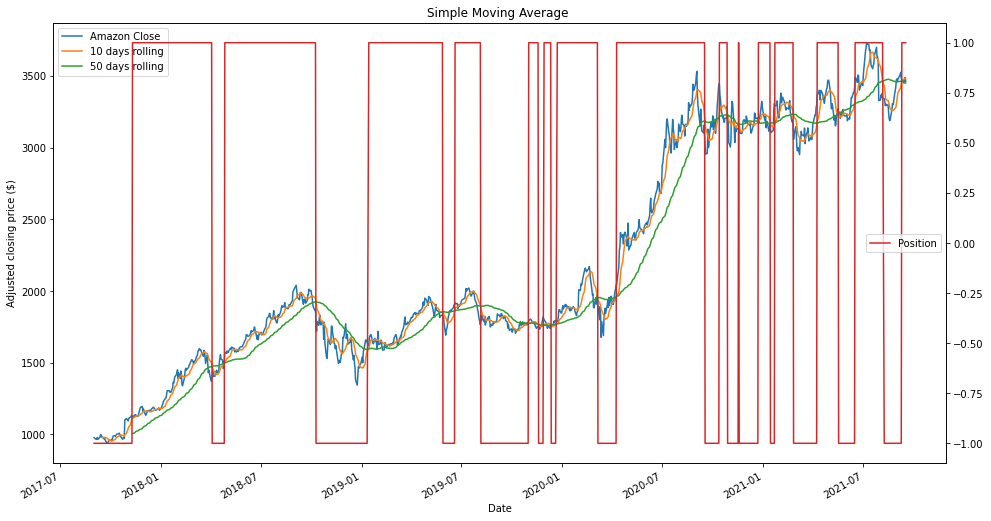

In [335]:
lista=[amazon]
for count, a in enumerate (lista):
    def movingavwerage(name):
        company = name['Adj Close']

        short_company = company.rolling(window=10).mean()
        short_company1 = company.rolling(window=50).mean()
        name['Position']= np.where( short_company > short_company1, 1, -1)  
      
        rolling= short_company 
        # Plot everything by leveraging the very powerful matplotlib package
        fig, ax = plt.subplots(figsize=(16,9))

        ax.plot(company.index,company, label= "Amazon Close")
        ax.plot(short_company.index, short_company, label='10 days rolling')
        ax.plot(short_company.index, short_company1, label='50 days rolling')
      
        ax.set_xlabel('Date')
        ax.set_ylabel('Adjusted closing price ($)')
        ax.set_title("Simple Moving Average ")
        ax.legend()
        ax = name['Position'].plot(secondary_y='Position',label='Position' )
        ax.legend()
        return rolling
        

    movingavwerage(a)

# Random Walk Hypothesis

In [336]:
symbol= ['Adj Close']

In [337]:
data= pd.DataFrame(amazon[symbol])

In [338]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    colu = 'lag_{}'.format(lag)  
    data[colu] = data[symbol].shift(lag)  
    cols.append(colu)  

In [339]:
data[colu]

Date
2017-09-01            NaN
2017-09-05            NaN
2017-09-06            NaN
2017-09-07            NaN
2017-09-08            NaN
                 ...     
2021-09-13    3478.050049
2021-09-14    3509.290039
2021-09-15    3525.500000
2021-09-16    3484.159912
2021-09-17    3469.149902
Name: lag_5, Length: 1018, dtype: float64

In [340]:
data.dropna(inplace=True)

In [341]:
#new = np.linalg.lstsq(data[colu], amazon['Adj Close'], rcond=-1)[0]

In [342]:
#new.round(3)

In [343]:
###plt.figure(figsize=(10, 6))
#plt.bar(cols, new);

In [344]:
#data['Prediction'] = np.dot(data[colu], new)

In [345]:
#data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6));

In [346]:
data[symbol]

,Adj Close
Date,
2017-09-11,977.960022
2017-09-12,982.580017
2017-09-13,999.599976
2017-09-14,992.210022
2017-09-15,986.789978
...,...
2021-09-13,3457.169922
2021-09-14,3450.000000
2021-09-15,3475.790039


In [347]:
data

,Adj Close,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2017-09-11,977.960022,965.900024,979.469971,967.799988,965.270020,978.250000
2017-09-12,982.580017,977.960022,965.900024,979.469971,967.799988,965.270020
2017-09-13,999.599976,982.580017,977.960022,965.900024,979.469971,967.799988
2017-09-14,992.210022,999.599976,982.580017,977.960022,965.900024,979.469971
2017-09-15,986.789978,992.210022,999.599976,982.580017,977.960022,965.900024
...,...,...,...,...,...,...
2021-09-13,3457.169922,3469.149902,3484.159912,3525.500000,3509.290039,3478.050049
2021-09-14,3450.000000,3457.169922,3469.149902,3484.159912,3525.500000,3509.290039
2021-09-15,3475.790039,3450.000000,3457.169922,3469.149902,3484.159912,3525.500000


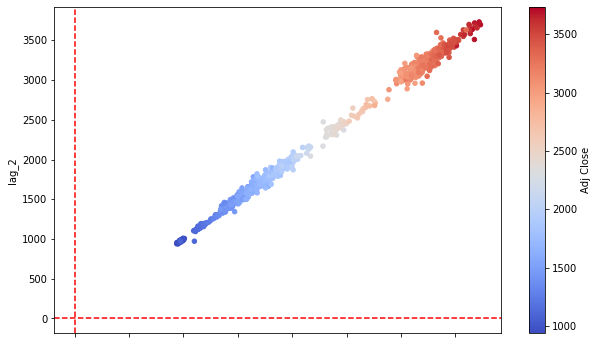

In [348]:
data.plot.scatter(x='lag_1', y='lag_2', c='Adj Close', 
                  cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

# PART-2

# Applying Machine Learning Algorithms to the Stock

In [349]:
from sklearn.model_selection import train_test_split

In [350]:
x1=amazon[['Close']]
y1=amazon['Close']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.35, shuffle= True)
print("X1-Train Shape: ", x1_train.shape,'\n' "Y1-Train Shape(Dependent):", y1_train.shape)
print("X1-Test Shape: ", x1_test.shape,'\n' "Y1-Test Shape(Dependent):", y1_test.shape)

X1-Train Shape:  (661, 1) 
Y1-Train Shape(Dependent): (661,)
X1-Test Shape:  (357, 1) 
Y1-Test Shape(Dependent): (357,)


In [351]:
print(x1_train)
print(x1_test)
print(y1_train)
print(y1_test) 

                  Close
Date                   
2020-06-29  2680.379883
2020-01-09  1901.050049
2021-08-02  3331.479980
2021-06-22  3505.439941
2020-08-31  3450.959961
...                 ...
2018-06-05  1696.349976
2018-10-22  1789.300049
2020-06-08  2524.060059
2017-12-18  1190.579956
2019-12-18  1784.030029

[661 rows x 1 columns]
                  Close
Date                   
2020-07-27  3055.209961
2019-02-20  1622.099976
2018-07-24  1829.239990
2021-07-23  3656.639893
2021-04-27  3417.429932
...                 ...
2021-01-13  3165.889893
2019-01-08  1656.579956
2020-09-04  3294.620117
2021-08-25  3299.179932
2018-07-23  1802.000000

[357 rows x 1 columns]
Date
2020-06-29    2680.379883
2020-01-09    1901.050049
2021-08-02    3331.479980
2021-06-22    3505.439941
2020-08-31    3450.959961
                 ...     
2018-06-05    1696.349976
2018-10-22    1789.300049
2020-06-08    2524.060059
2017-12-18    1190.579956
2019-12-18    1784.030029
Name: Close, Length: 661, dtype: floa

# Normalizing Data

In [352]:
from sklearn import preprocessing

In [353]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(x1_train) 
scaler.fit(x1_test)
x1_train = scaler.transform(x1_train) 
x1_test = scaler.transform(x1_test)

# Machine Learning

#linear OLS Regression

In [354]:
symbol=['Close']

In [355]:
data = pd.DataFrame(amazon[symbol])

In [356]:
data['returns'] = np.log(amazon['Close']/ amazon['Close'].shift(1))

In [357]:
data.dropna(inplace=True)

In [358]:
data['direction'] = np.sign(data['returns']).astype(int)

In [359]:
data.head()

,Close,returns,direction
Date,,,
2017-09-05,965.270020,-0.013357,-1
2017-09-06,967.799988,0.002618,1
2017-09-07,979.469971,0.011986,1
2017-09-08,965.900024,-0.013951,-1
2017-09-11,977.960022,0.012408,1


Text(0.5, 1.0, 'frequency Distribution of Daily Historical Log Returns of Amazon in Eur/Usd')

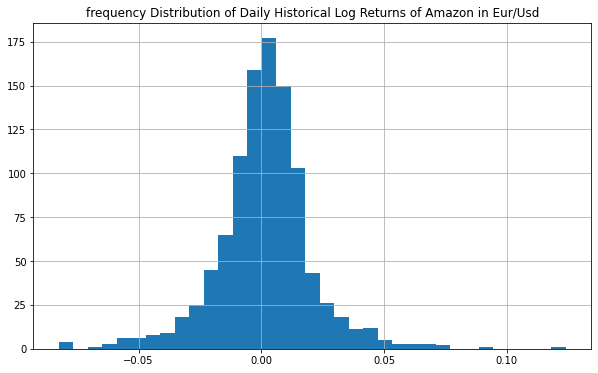

In [360]:
data['returns'].hist(bins=35, figsize=(10, 6));
plt.title("frequency Distribution of Daily Historical Log Returns of Amazon in Eur/Usd")

In [361]:
lags = 2

In [362]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [363]:
create_lags(data)

In [364]:
data.dropna(inplace=True)

In [365]:
data.head()

,Close,returns,direction,lag_1,lag_2
Date,,,,,
2017-09-07,979.469971,0.011986,1,0.002618,-0.013357
2017-09-08,965.900024,-0.013951,-1,0.011986,0.002618
2017-09-11,977.960022,0.012408,1,-0.013951,0.011986
2017-09-12,982.580017,0.004713,1,0.012408,-0.013951
2017-09-13,999.599976,0.017173,1,0.004713,0.012408


In [366]:
data.shape

(1015, 5)

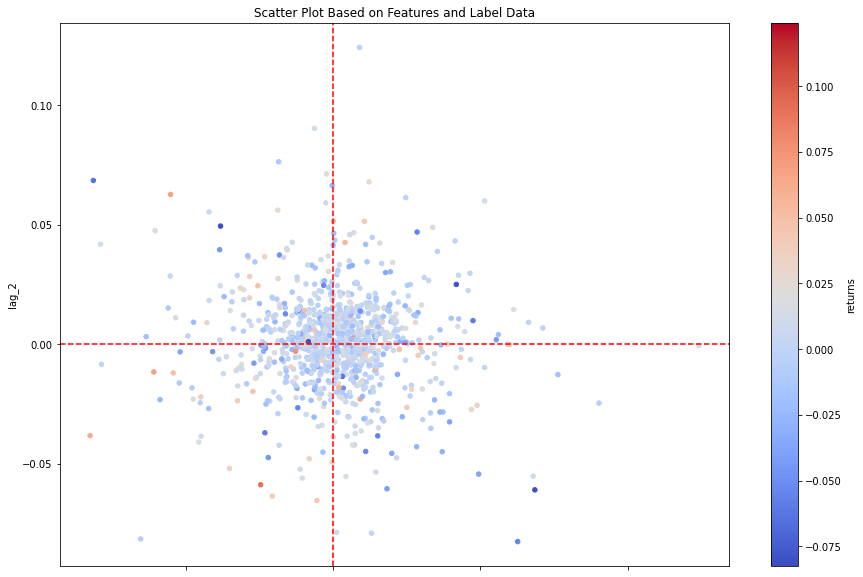

In [367]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns', cmap='coolwarm', figsize=(15, 10), colorbar=True)
plt.title("Scatter Plot Based on Features and Label Data")
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');


### Regression

In [368]:
from sklearn.linear_model import LinearRegression  

In [369]:
model = LinearRegression()  

In [370]:
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])  

In [371]:
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])  

In [372]:
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2017-09-07,0.001116,0.089668
2017-09-08,0.000678,0.089656
2017-09-11,0.002133,0.136479
2017-09-12,0.000580,0.074562
2017-09-13,0.001119,0.109040


In [373]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(
            data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)  

In [374]:
data['pos_ols_1'].value_counts()  

 1    934
-1     81
Name: pos_ols_1, dtype: int64

In [375]:
data['pos_ols_2'].value_counts()  

 1    1008
-1       7
Name: pos_ols_2, dtype: int64

In [376]:
(data['pos_ols_1'].diff() != 0).sum()  

143

In [377]:
(data['pos_ols_2'].diff() != 0).sum()  

15

In [378]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']

In [379]:
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

In [380]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        3.577723
strat_ols_1    5.829880
strat_ols_2    5.112814
dtype: float64

In [381]:
(data['direction'] == data['pos_ols_1']).value_counts()  

True     560
False    455
dtype: int64

In [382]:
(data['direction'] == data['pos_ols_2']).value_counts()  

True     563
False    452
dtype: int64

Text(0.5, 1.0, 'Performance of EUR/USD and Regression Based Stratergies over Time')

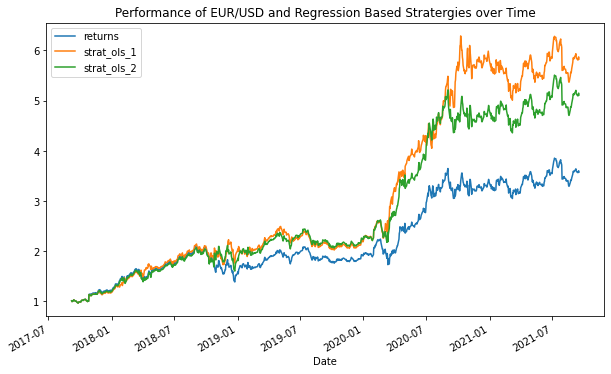

In [383]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));
plt.title("Performance of EUR/USD and Regression Based Stratergies over Time")


# Clustering

*   https://github.com/ttimong/blog-posts/blob/master/blog1-kmeans-clustering/final_model.ipynb




In [384]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score

In [385]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [386]:
from sklearn.cluster import KMeans

In [387]:
model = KMeans(n_clusters=4, random_state=0)

In [388]:
model.fit(data[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [389]:
data['pos_clus'] = model.predict(data[cols])

In [390]:
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)

In [391]:
data['pos_clus'].values

array([1, 1, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'K-Means Cluster')

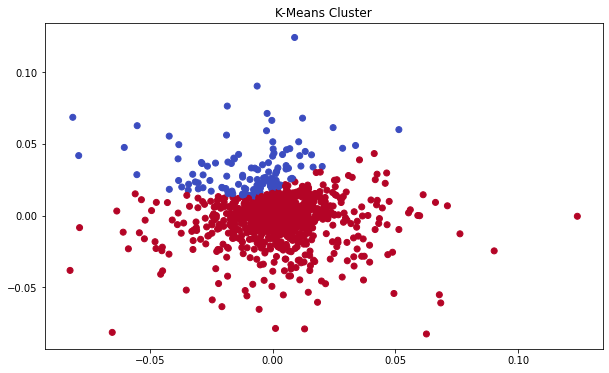

In [392]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
            c=data['pos_clus'], cmap='coolwarm');
plt.title("K-Means Cluster")

In [393]:
data['strat_clus'] = data['pos_clus'] * data['returns']

In [394]:
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       3.577723
strat_clus    2.139260
dtype: float64

In [395]:
(data['direction'] == data['pos_clus']).value_counts()

True     543
False    472
dtype: int64

Text(0.5, 1.0, 'Performance fo K-Means Algorithm based on Strategy over Time')

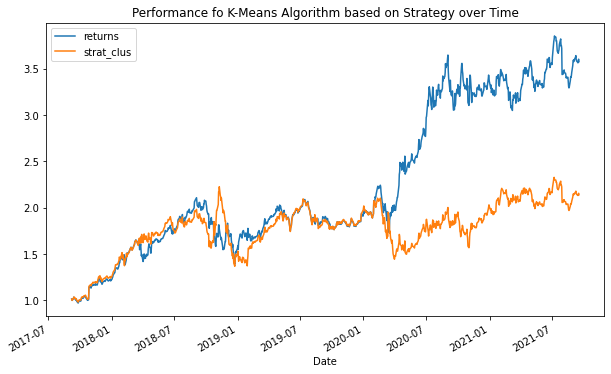

In [396]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6));
plt.title("Performance fo K-Means Algorithm based on Strategy over Time")

## Frequency Approach

In [397]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)  
        cols_bin.append(col_bin)

In [398]:
create_bins(data)

In [399]:
data[cols_bin + ['direction']].head()  

,lag_1_bin,lag_2_bin,direction
Date,,,
2017-09-07,1,0,1
2017-09-08,1,1,-1
2017-09-11,0,1,1
2017-09-12,1,0,1
2017-09-13,1,1,1


In [400]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()  

lag_1_bin  lag_2_bin  direction
0          0          -1            96
                       1           112
           1          -1           112
                       1           133
1          0          -1           105
                       1           141
           1          -1           141
                       0             1
                       1           174
dtype: int64

In [401]:
res = grouped['direction'].size().unstack(fill_value=0)  

In [402]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]  

In [403]:
res.style.apply(highlight_max, axis=1)  

In [404]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)  

In [405]:
(data['direction'] == data['pos_freq']).value_counts()

True     527
False    488
dtype: int64

In [406]:
data['strat_freq'] = data['pos_freq'] * data['returns']

In [407]:
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       3.577723
strat_freq    1.925067
dtype: float64

Text(0.5, 1.0, 'Frequency Based Trading Strategy over Time')

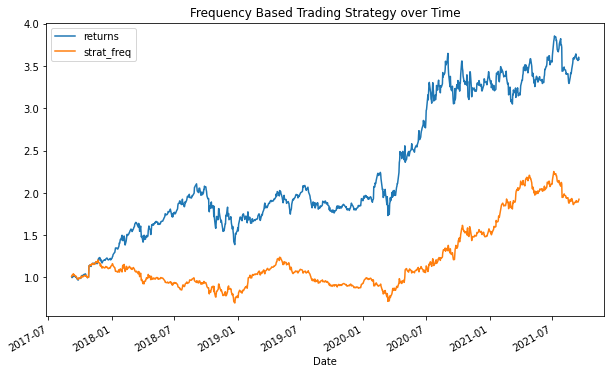

In [408]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(10, 6));
plt.title("Frequency Based Trading Strategy over Time")

## Classification Algorithms

In [409]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [410]:
C = 1

In [411]:
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}

In [412]:
def fit_models(data):  
    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
            for model in models.keys()} 

In [413]:
fit_models(data)

In [414]:
def derive_positions(data):  
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [415]:
derive_positions(data)

In [416]:
def evaluate_strats(data):  
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model 
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')

In [417]:
evaluate_strats(data)

In [418]:
sel.insert(1, 'strat_freq')

In [419]:
data[sel].sum().apply(np.exp)  

returns           3.577723
strat_freq        1.925067
strat_log_reg     3.577723
strat_gauss_nb    2.624377
strat_svm         3.577723
dtype: float64

Text(0.5, 1.0, 'Performace of Classification based on Trading Strategies with Two Binary Lag over Time')

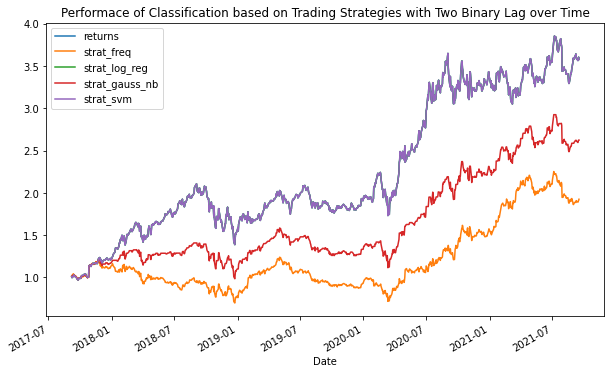

In [420]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));
plt.title("Performace of Classification based on Trading Strategies with Two Binary Lag over Time")

In [421]:
data = pd.DataFrame(amazon[symbol])

In [422]:
data['returns'] = np.log(data / data.shift(1))

In [423]:
data['direction'] = np.sign(data['returns'])

In [424]:
lags = 5  
create_lags(data)
data.dropna(inplace=True)

In [425]:
create_bins(data)  
cols_bin

['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [426]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2017-09-12,1,0,1,1,0
2017-09-13,1,1,0,1,1
2017-09-14,1,1,1,0,1
2017-09-15,0,1,1,1,0
2017-09-18,0,0,1,1,1


In [427]:
data.dropna(inplace=True)

In [428]:
fit_models(data)

In [429]:
derive_positions(data)

In [430]:
evaluate_strats(data)

In [431]:
data[sel].sum().apply(np.exp)

returns            3.540554
strat_log_reg      3.540554
strat_gauss_nb     3.097350
strat_svm         17.279400
dtype: float64

Text(0.5, 1.0, 'Performace of Classification based on Trading Strategies with five Binary Lag over Time')

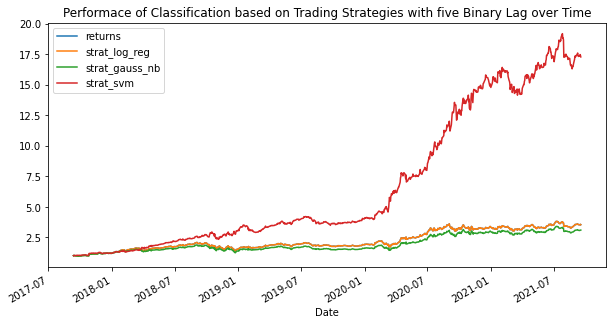

In [432]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 5));
plt.title("Performace of Classification based on Trading Strategies with five Binary Lag over Time")

In [433]:
mu = data['returns'].mean()  
v = data['returns'].std()  

In [434]:
bins = [mu - v, mu, mu + v]  
bins  

[-0.018449260206205378, 0.001249291640733414, 0.020947843487672205]

In [435]:
create_bins(data, bins)

In [436]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin
Date,,,,,
2017-09-12,2,1,2,2,1
2017-09-13,2,2,1,2,2
2017-09-14,2,2,2,1,2
2017-09-15,1,2,2,2,1
2017-09-18,1,1,2,2,2


In [437]:
fit_models(data)

In [438]:
derive_positions(data)

In [439]:
evaluate_strats(data)

In [440]:
data[sel].sum().apply(np.exp)

returns            3.540554
strat_log_reg      3.105906
strat_gauss_nb     3.637783
strat_svm         95.640467
dtype: float64

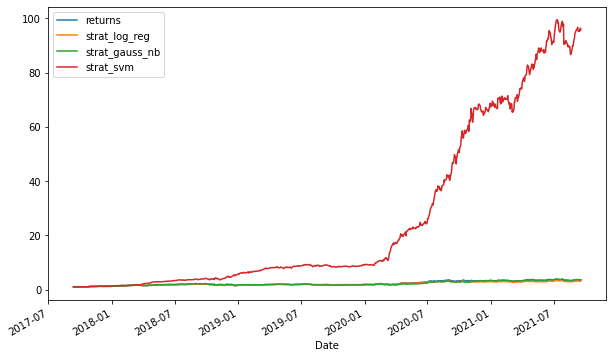

In [441]:
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_ml_09.png')

## Deep Neural Network

### DNN with scikit-learn

In [442]:
from sklearn.neural_network import MLPClassifier

In [443]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=2 * [250], random_state=1)

In [444]:
%time model.fit(data[cols_bin], data['direction'])

CPU times: user 10.4 s, sys: 9.08 s, total: 19.4 s
Wall time: 10.2 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[250, 250], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [445]:
data['pos_dnn_sk'] = model.predict(data[cols_bin])

In [446]:
data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']

In [447]:
data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns            3.540554
strat_dnn_sk    2941.624637
dtype: float64

Text(0.5, 1.0, 'Performace of DNN based on Trading Strategies Using MLP Classifier')

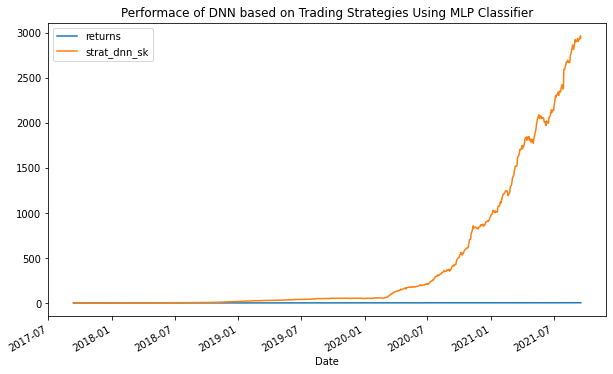

In [448]:
data[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));
plt.title("Performace of DNN based on Trading Strategies Using MLP Classifier")

In [449]:
train, test = train_test_split(data, test_size=0.5, random_state=100)

In [450]:
train = train.copy().sort_index()

In [451]:
test = test.copy().sort_index()

In [452]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                     hidden_layer_sizes=3 * [500], random_state=1)  

In [453]:
%time model.fit(train[cols_bin], train['direction'])

CPU times: user 1min 45s, sys: 1min 31s, total: 3min 16s
Wall time: 1min 40s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[500, 500, 500], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [454]:
test['pos_dnn_sk'] = model.predict(test[cols_bin])

In [455]:
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']

In [456]:
test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         1.423387
strat_dnn_sk    0.578477
dtype: float64

Text(0.5, 1.0, 'Performace of Classification of DNN based on Trading Strategies Using MLP Classifier with Rnadomized Test/Train split')

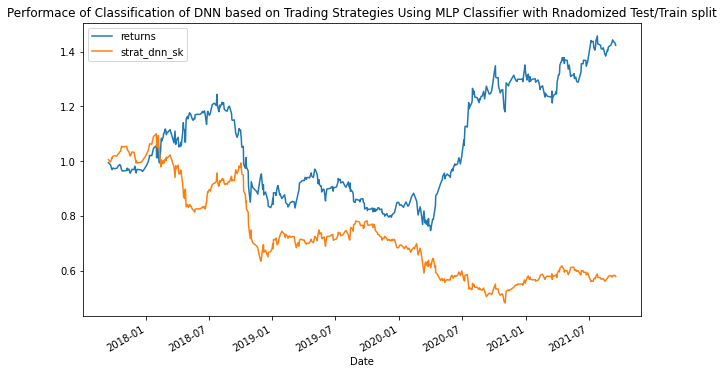

In [457]:
test[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(10, 6));
plt.title("Performace of Classification of DNN based on Trading Strategies Using MLP Classifier with Rnadomized Test/Train split")